In [27]:
import argparse
from copy import deepcopy
from matplotlib import pyplot as plt
import numpy as np

import torch
import torch.nn.functional as F
from torch import nn, optim
from torch.utils.data import TensorDataset
import torchvision 
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [3]:
Edata = torchvision.datasets.EMNIST(root='emnist',split='balanced' , download=True)

  0%|          | 0/561753746 [00:00<?, ?it/s]

Extracting emnist/EMNIST/raw/gzip.zip to emnist/EMNIST/raw


In [5]:
print(Edata.classes)
print(str(len(Edata.classes))+ 'classes')
print('\nData size:')
print(Edata.data.shape)
images = Edata.data.view([112800,1,28,28]).float()
print('\nTensor data:')
print(images.shape)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']
47classes

Data size:
torch.Size([112800, 28, 28])

Tensor data:
torch.Size([112800, 1, 28, 28])


In [6]:
print(torch.sum(Edata.targets == 0))
torch.unique(Edata.targets)

tensor(2400)


tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [7]:
import copy
letterCategories = Edata.classes[1:]
labels = copy.deepcopy(Edata.targets)-1
print(labels.shape)
print(torch.sum(labels==0))
torch.unique(labels)

torch.Size([112800])
tensor(2400)


tensor([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [30]:

transformCustom = transforms.Compose([
                                      transforms.ToTensor(), #convert to tensor
                                      transforms.Lambda(lambda x:x.view(-1)) #flatten 28*28 into 784 vector for each image
                                      ])

train = torchvision.datasets.EMNIST(root='.',train=True,transform=transformCustom, download=True,split='balanced')
test = torchvision.datasets.EMNIST(root='.',train=False,transform=transformCustom, download=True,split='balanced')

  0%|          | 0/561753746 [00:00<?, ?it/s]

Extracting ./EMNIST/raw/gzip.zip to ./EMNIST/raw


In [32]:
print(train)
print(train.train_data.shape)
print(train.train_labels.shape)

Dataset EMNIST
    Number of datapoints: 112800
    Root location: .
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Lambda()
           )
torch.Size([112800, 28, 28])
torch.Size([112800])


/usr/local/lib/python3.9/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.9/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [70]:
import pandas as pd
tests = pd.Series(train.train_labels).value_counts().sort_index()

label_list = list('0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt')

print('"classes"   "Number"   "Percentage"')
total = int(train.train_labels.shape[0])
for i,letter in enumerate(label_list):
  print(f'Letter {letter} :   {tests[i]} \t({(int(tests[i])/total)*100:.2f}%)')

"classes"   "Number"   "Percentage"
Letter 0 :   2400 	(2.13%)
Letter 1 :   2400 	(2.13%)
Letter 2 :   2400 	(2.13%)
Letter 3 :   2400 	(2.13%)
Letter 4 :   2400 	(2.13%)
Letter 5 :   2400 	(2.13%)
Letter 6 :   2400 	(2.13%)
Letter 7 :   2400 	(2.13%)
Letter 8 :   2400 	(2.13%)
Letter 9 :   2400 	(2.13%)
Letter A :   2400 	(2.13%)
Letter B :   2400 	(2.13%)
Letter C :   2400 	(2.13%)
Letter D :   2400 	(2.13%)
Letter E :   2400 	(2.13%)
Letter F :   2400 	(2.13%)
Letter G :   2400 	(2.13%)
Letter H :   2400 	(2.13%)
Letter I :   2400 	(2.13%)
Letter J :   2400 	(2.13%)
Letter K :   2400 	(2.13%)
Letter L :   2400 	(2.13%)
Letter M :   2400 	(2.13%)
Letter N :   2400 	(2.13%)
Letter O :   2400 	(2.13%)
Letter P :   2400 	(2.13%)
Letter Q :   2400 	(2.13%)
Letter R :   2400 	(2.13%)
Letter S :   2400 	(2.13%)
Letter T :   2400 	(2.13%)
Letter U :   2400 	(2.13%)
Letter V :   2400 	(2.13%)
Letter W :   2400 	(2.13%)
Letter X :   2400 	(2.13%)
Letter Y :   2400 	(2.13%)
Letter Z :   2400 	

/usr/local/lib/python3.9/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [71]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.dataset import TensorDataset
batchSize = 128 
train_loader = DataLoader(train, batch_size = batchSize, shuffle=True)
test_loader = DataLoader(test, batch_size = batchSize, shuffle=False)

torch.Size([128, 784]) torch.Size([128])


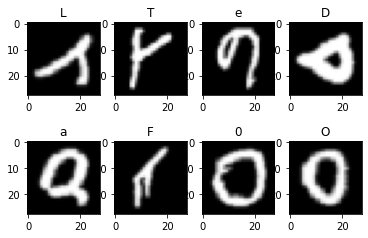

In [72]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

for i in range(8):
  plt.subplot(2,4,i+1)
  plt.title(label_list[labels[i].detach().numpy()])
  plt.imshow(samples[i].reshape((28,28)), cmap='gray')
     

In [77]:
count_batch = 0
for x,y in train_loader:
  count_batch+=1

print(f'Number of batches in train dataset: {count_batch} ')

Number of batches in train dataset: 882 


In [79]:
count_test = 0
for x,y in test_loader:
  count_test+=1

print(f'Number of batches in train dataset: {count_test} ')
     

Number of batches in train dataset: 147 


In [182]:

# MLP_1: 1 hidden layer
class MLP_1(nn.Module):
  def __init__(self,input_size, hidden_size, num_classes):
    super(MLP_1,self).__init__()
    self.layer1 = nn.Linear(input_size,hidden_size)
    self.layer2 = nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out = self.layer1(x)
    out = F.sigmoid(out)
    out = self.layer2(out)
    if not self.training:
      out = F.softmax(out,dim=1) 
    return out

# MLP_2: 2 hidden layer normal
class MLP_2(nn.Module):
  def __init__(self,input_size, hidden_size1, hidden_size2, num_classes):
    super(MLP_2,self).__init__()
    self.layer1 = nn.Linear(input_size,hidden_size1)
    self.layer2 = nn.Linear(hidden_size1,hidden_size2)
    self.layer3 = nn.Linear(hidden_size2,num_classes)

  def forward(self,x):
    out = self.layer1(x)
    out = F.sigmoid(out)
    out = self.layer2(out)
    out = F.sigmoid(out)
    out = self.layer3(out)
    if not self.training:
      out = F.softmax(out,dim=1)
    return out

# MLP_2_DROP: 2 hidden layer with dropout
class MLP_2_DROP(nn.Module):
  def __init__(self,input_size, hidden_size1, hidden_size2, num_classes):
    super(MLP_2_DROP,self).__init__()
    self.layer1 = nn.Linear(input_size,hidden_size1)
    self.layer2 = nn.Linear(hidden_size1,hidden_size2)
    self.layerDrop = nn.Dropout(0.2)
    self.layer3 = nn.Linear(hidden_size2,num_classes)

  def forward(self,x):
    out = self.layer1(x)
    out = F.sigmoid(out)
    out = self.layer2(out)
    out = F.sigmoid(out)
    out = self.layerDrop(out)
    out = self.layer3(out)
    if not self.training:
      out = F.softmax(out,dim=1) 
    return out

# MLP_3: 3 hidden layer
class MLP_3(nn.Module):
  def __init__(self,input_size, hidden_size1, hidden_size2, hidden_size3, num_classes):
    super(MLP_3,self).__init__()
    self.layer1 = nn.Linear(input_size,hidden_size1)
    self.layer2 = nn.Linear(hidden_size1,hidden_size2)
    self.layer3 = nn.Linear(hidden_size2,hidden_size3)
    self.layer4 = nn.Linear(hidden_size3,num_classes)

  def forward(self,x):
    out = self.layer1(x)
    out = F.sigmoid(out)
    out = self.layer2(out)
    out = F.sigmoid(out)
    out = self.layer3(out)
    out = F.sigmoid(out)
    out = self.layer4(out)
    if not self.training:
      out = F.softmax(out,dim=1) 
    return out

In [183]:
input_size = 784
num_classes = 47

model_layer1 = MLP_1(input_size, 570, num_classes)
model_layer2 = MLP_2(input_size, 570, 427, num_classes)
model_layer2drop = MLP_2_DROP(input_size, 570, 427, num_classes)
model_layer3 = MLP_3(input_size, 570, 427, 332, num_classes)

In [184]:
model_layer1.load_state_dict(torch.load('model1.weights'))
model_layer2.load_state_dict(torch.load('model2.weights'))
model_layer2drop.load_state_dict(torch.load('model2drop.weights'))
model_layer3.load_state_dict(torch.load('model3.weights'))

<All keys matched successfully>

In [164]:
num_epochs = 10

loss_fn = nn.CrossEntropyLoss()
opt1 = torch.optim.Adam(model_layer1.parameters()) 
opt2n = torch.optim.Adam(model_layer2.parameters())
opt2d = torch.optim.Adam(model_layer2drop.parameters())
opt3 = torch.optim.Adam(model_layer3.parameters())

loss_epoch1 = []
loss_epoch2n = []
loss_epoch2d = []
loss_epoch3 = []

print("Training 1 hidden Layer:")
for epoch in range(num_epochs):
  model_layer1.train()
  loss = 0

  for input, target_batch in train_loader:
    opt1.zero_grad() 
    predict_batch = model_layer1(input) #forward
    loss_batch = loss_fn(predict_batch, target_batch) #loss
    loss_batch.backward() #backward

    opt1.step() #update weights
    loss += loss_batch.item()

  loss_epoch1.append(loss)
  print(f'Epoch: {epoch+1}  loss: {loss}')
print(f'Learning parameters is: {sum(p.numel() for p in model_layer1.parameters() if p.requires_grad)}')

print("*****************************************\n")
print("Training 2 hidden Layer Normal:")
for epoch in range(num_epochs):
  model_layer2.train()
  loss = 0

  for input, target_batch in train_loader:
    opt2n.zero_grad()
    predict_batch = model_layer2(input) #forward
    loss_batch = loss_fn(predict_batch, target_batch) #loss
    loss_batch.backward() #backward

    opt2n.step() #update weights
    loss += loss_batch.item()

  loss_epoch2n.append(loss)
  print(f'Epoch: {epoch+1}  loss: {loss}')
print(f'Learning parameters is: {sum(p.numel() for p in model_layer2.parameters() if p.requires_grad)}')

print("*****************************************\n")
print("Training 2 hidden Layer With Dropout:")
for epoch in range(num_epochs):
  model_layer2drop.train()
  loss = 0

  for input, target_batch in train_loader:
    opt2d.zero_grad() 
    predict_batch = model_layer2drop(input) #forward
    loss_batch = loss_fn(predict_batch, target_batch) #loss
    loss_batch.backward() #backward

    opt2d.step() #update weights
    loss += loss_batch.item()

  loss_epoch2d.append(loss)
  print(f'Epoch: {epoch+1}  loss: {loss}')
print(f'Learning parameters is: {sum(p.numel() for p in model_layer2drop.parameters() if p.requires_grad)}')

print("*****************************************\n")
print("Training 3 hidden Layer:")
for epoch in range(num_epochs):
  model_layer3.train()
  loss = 0

  for input, target_batch in train_loader:
    opt3.zero_grad() 
    predict_batch = model_layer3(input) #forward
    loss_batch = loss_fn(predict_batch, target_batch) #loss
    loss_batch.backward() #backward

    opt3.step() #update weights
    loss += loss_batch.item()

  loss_epoch3.append(loss)
  print(f'Epoch: {epoch+1}  loss: {loss}')
print(f'Learning parameters is: {sum(p.numel() for p in model_layer3.parameters() if p.requires_grad)}')
  

Training 1 hidden Layer:
Epoch: 1  loss: 284.8777794390917
Epoch: 2  loss: 262.6149064414203
Epoch: 3  loss: 250.93636675179005
Epoch: 4  loss: 236.50438810884953
Epoch: 5  loss: 234.7890062816441
Epoch: 6  loss: 222.0900409258902
Epoch: 7  loss: 213.3533588182181
Epoch: 8  loss: 211.1856044344604
Epoch: 9  loss: 203.7217687200755
Epoch: 10  loss: 204.81567726284266
Learning parameters is: 474287
*****************************************

Training 2 hidden Layer Normal:
Epoch: 1  loss: 100.06675751507282
Epoch: 2  loss: 98.57210479862988
Epoch: 3  loss: 94.80297289788723
Epoch: 4  loss: 90.03556370548904
Epoch: 5  loss: 90.65276801213622
Epoch: 6  loss: 91.3111968068406
Epoch: 7  loss: 86.35330037306994
Epoch: 8  loss: 84.11947012133896
Epoch: 9  loss: 83.2050456404686
Epoch: 10  loss: 81.29803251288831
Learning parameters is: 711383
*****************************************

Training 2 hidden Layer With Dropout:
Epoch: 1  loss: 150.0035155750811
Epoch: 2  loss: 135.8653983399272
Epoch

In [165]:
losses = [loss_epoch1,loss_epoch2n,loss_epoch2d,loss_epoch3]

with open('./losses.txt', 'a') as testwritefile:
    testwritefile.write(str(losses))
     

In [166]:
loss_epoch1,loss_epoch2n,loss_epoch2d,loss_epoch3 = [],[],[],[]
losses = [loss_epoch1,loss_epoch2n,loss_epoch2d,loss_epoch3]

with open('./losses.txt', 'r') as testwritefile:
    lossess = testwritefile.read()

for losses_each, losses_list in zip(lossess.split("[[")[1].split("]]")[0].split("], ["),losses):
  for each in losses_each.split(","):
    losses_list.append(float(each.strip()))

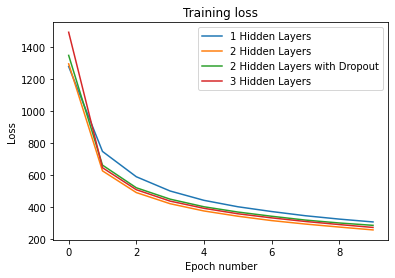

In [167]:
num_epochs = 10

plt.plot(range(num_epochs), loss_epoch1, label="1 Hidden Layers")
plt.plot(range(num_epochs), loss_epoch2n, label="2 Hidden Layers")
plt.plot(range(num_epochs), loss_epoch2d, label="2 Hidden Layers with Dropout")
plt.plot(range(num_epochs), loss_epoch3, label="3 Hidden Layers")
plt.title('Training loss')
plt.xlabel("Epoch number")
plt.ylabel("Loss")
plt.legend()

In [168]:
torch.save(model_layer1.state_dict(), "./model1.weights")
torch.save(model_layer2.state_dict(), "./model2.weights")
torch.save(model_layer2drop.state_dict(), "./model2drop.weights")
torch.save(model_layer3.state_dict(), "./model3.weights")

In [169]:
model_layer1 = model_layer1.eval()
model_layer2 = model_layer2.eval()
model_layer2drop = model_layer2drop.eval()
model_layer3 = model_layer3.eval()

In [170]:
def eval_model_acc_err(loader,model):
  n_correct = 0
  n_total = 0

  for input_batch, target_batch in loader:
    predict_batch = model(input_batch) 
    _, predictions = torch.max(predict_batch, 1)
    n_total += target_batch.shape[0]
    n_correct += (predictions == target_batch).sum().item()

  acc = round((n_correct / n_total)*100,2)
  err = round(1-(n_correct / n_total),2)
  # print(f'data number: {n_total}')
  # print(f'wrong predicted label nuber: {n_total - n_correct}')
  # print(f'Accuracy: {acc}')
  return acc,err

In [171]:
print('1 hidden Layer...')
print("Training Data:")
train1_acc,train1_err = eval_model_acc_err(train_loader, model_layer1)
print(f'training error : {train1_err}')
print(f'training accuracy {train1_acc:.2f}%')
print('-------------------------------------------\n')

print("\nTesting Data:")
test1_acc,test1_err = eval_model_acc_err(test_loader, model_layer1)
print(f'Testing error : {test1_err}')
print(f'Testing accuracy {test1_acc:.2f}%')
print('*******************************************\n')


print('2 hidden Layer Normal...')
train2n_acc,train2n_err = eval_model_acc_err(train_loader, model_layer2)
print(f'training error : {train2n_err}')
print(f'training accuracy {train2n_acc:.2f}%')
print('-------------------------------------------\n')

test2n_acc,test2n_err = eval_model_acc_err(test_loader, model_layer2)
print(f'Testing error : {test2n_err}')
print(f'Testing accuracy {test2n_acc:.2f}%')
print('*******************************************\n')


print('2 hidden Layer with Dropout...')
train2d_acc,train2d_err = eval_model_acc_err(train_loader, model_layer2drop)
print(f'training error : {train2d_err}')
print(f'training accuracy {train2d_acc:.2f}%')
print('-------------------------------------------\n')

test2d_acc,test2d_err = eval_model_acc_err(test_loader, model_layer2drop)
print(f'Testing error : {test2d_err}')
print(f'Testing accuracy {test2d_acc:.2f}%')
print('*******************************************\n')


print('3 hidden Layer...')
train3_acc,train3_err = eval_model_acc_err(train_loader, model_layer3)
print(f'training error : {train3_err}')
print(f'training accuracy {train3_acc:.2f}%')
print('-------------------------------------------\n')

test3_acc,test3_err = eval_model_acc_err(test_loader, model_layer3)
print(f'Testing error : {test3_err}')
print(f'Testing accuracy {test3_acc:.2f}%')

1 hidden Layer...
Training Data:
training error : 0.07
training accuracy 93.34%
-------------------------------------------


Testing Data:
Testing error : 0.19
Testing accuracy 81.38%
*******************************************

2 hidden Layer Normal...
training error : 0.03
training accuracy 96.99%
-------------------------------------------

Testing error : 0.16
Testing accuracy 83.73%
*******************************************

2 hidden Layer with Dropout...
training error : 0.04
training accuracy 95.86%
-------------------------------------------

Testing error : 0.16
Testing accuracy 84.49%
*******************************************

3 hidden Layer...
training error : 0.04
training accuracy 95.56%
-------------------------------------------

Testing error : 0.16
Testing accuracy 83.80%


In [159]:
params_m1 = sum(p.numel() for p in model_layer1.parameters() if p.requires_grad)
params_m2 = sum(p.numel() for p in model_layer2.parameters() if p.requires_grad)
params_m2drop = sum(p.numel() for p in model_layer2drop.parameters() if p.requires_grad)
params_m3 = sum(p.numel() for p in model_layer3.parameters() if p.requires_grad)
params_all = [params_m1,params_m2,params_m2drop,params_m3]

train_acc_all = [train1_acc,train2n_acc,train2d_acc,train3_acc]
test_acc_all = [test1_acc,test2n_acc,test2d_acc,test3_acc]

train_err_all = [train1_err,train2n_err,train2d_err,train3_err]
test_err_all = [test1_err,test2n_err,test2d_err,test3_err]

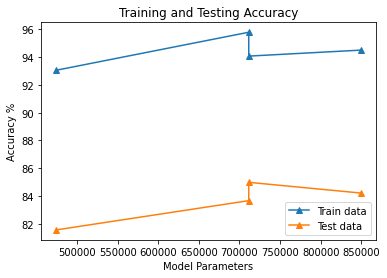

In [160]:
plt.plot(params_all,train_acc_all,marker='^',label='Train data')
plt.plot(params_all,test_acc_all,marker='^',label='Test data')
plt.title('Training and Testing Accuracy')
plt.xlabel("Model Parameters")
plt.ylabel("Accuracy %")
plt.legend()